In [265]:
# Climate Analysis & Exploration using Precipitation, Temperature for stations.
# Import Dependencies

# Import Sqlalchemy
import sqlalchemy
# Import the column types necessary that is being used in the database
from sqlalchemy import Column, Integer, String, Float

# Import automap base
from sqlalchemy.ext.automap import automap_base
# Import Session
from sqlalchemy.orm import Session
# Imports the method used for connecting and inspecting DB
from sqlalchemy import create_engine, inspect
# Import func from sqlalchemy to count
from sqlalchemy import func
# Import desc from sqlalchemy to order the records in descending order
from sqlalchemy import desc

# Import Pandas
import pandas as pd
# Import numpy
import numpy as np
# Import datetime 
import datetime as dt

# Import matplotlib,pyplot and the seaborn style in matplotlib
import matplotlib
# from matplotlib import style
# style.use('seaborn')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [266]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [267]:
# Connect to your sqlite database using sqlalchemy create_engine.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [268]:
# reflect an existing database into a new model 
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [269]:
# We can view all of the classes that automap found
# "keys" refers to the table names found by automap present in the class 
Base.classes.keys()

['measurement', 'station']

In [270]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
result = engine.execute("select *  from measurement").fetchall()
#engine.execute('select * from measurement').fetchall()
print(result[:10])

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0), (6, 'USC00519397', '2010-01-07', 0.06, 70.0), (7, 'USC00519397', '2010-01-08', 0.0, 64.0), (8, 'USC00519397', '2010-01-09', 0.0, 68.0), (9, 'USC00519397', '2010-01-10', 0.0, 73.0), (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]


In [271]:
# Use `engine.execute` to select and display the first 10 rows from the station table
result = engine.execute("select *  from station").fetchall()
engine.execute('select * from station').fetchall()
print(result[:10])

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6), (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]


In [272]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [273]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [274]:
#Basic Data engineering task

#"inspect" delivers runtime information about a wide variety of SQLAlchemy objects
Inspect = inspect(engine)

#To get the table names, we use get_table_names function from inspect
Inspect.get_table_names()

['measurement', 'station']

In [275]:
#To get the column details, we use get_column function from inspect
columns_measurement = Inspect.get_columns('measurement')

for cols in columns_measurement:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [276]:
#To get the column details, we use get_column function from inspect
columns_station = Inspect.get_columns('station')
for cols in columns_station:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [277]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11bec3080>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [278]:
 # Find the number of Measurement from the USA
usa = session.query(Measurement).filter(Measurement.station == 'USC00519397').count()
print("There are {} station from the USC00519397".format(usa))

There are 2724 station from the USC00519397


In [279]:
# Query Measurement for id`, `station`, date, prcp, tobs and `data` and save the query into results
id=[]
station=[]
date=[]
prcp=[]
tobs=[]
data=[]
for row in session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all():
    id.append(row[0])
    station.append(row[1])
    date.append(row[2])
    prcp.append(row[3])
    tobs.append(row[4])

In [280]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

In [281]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [282]:
#Step 1: Get the latest date
##Method 1: Using session.execute
Latest_date = session.execute("SELECT MAX(date) FROM Measurement").fetchall()
#print(Latest_date)
##Method 2: Using session.query
Latest_date = session.query(func.max(Measurement.date)).all()
#print(Latest_date)
End_Date = Latest_date[0][0]
print(End_Date)

2017-08-23


In [283]:
#Step 2: Get the year old date (Last year)
Struct = dt.date.today()
End_Date_dateformat = Struct.replace(year=int(End_Date[:4]),month=int(End_Date[5:7]),day=int(End_Date[8:]))
Last_date_year = End_Date_dateformat - dt.timedelta(days=365)    
Start_Date = Last_date_year.strftime("%Y-%m-%d")
print(Start_Date)

2016-08-23


In [284]:
# first_day = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=-730)
# first_day

In [285]:
print("Date range is starting from {} and ending at {}".format(Start_Date,End_Date))

Date range is starting from 2016-08-23 and ending at 2017-08-23


In [295]:
#Step 3: Perform a query to get the precipitation data for 1 year(as per the DB) (In desc order of date)
p_data = session.query(Measurement.date,Measurement.prcp)\
                          .filter(Measurement.date <= End_Date)\
                          .filter(Measurement.date >= Start_Date)\
                          .order_by(Measurement.date.desc()).all()

In [302]:
#Step 4: Save the query results as a Pandas DataFrame and set the index to the date column
PRCP_data_DF = pd.DataFrame(p_data).rename(columns={"date":"Date","prcp":"Precipitation Score"})
PRCP_data_DF.set_index("Date",inplace=True)
PRCP_data_DF.head()

,Precipitation Score
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [297]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Store this data into dataframe

# precipitation_df = pd.DataFrame(p_results, columns=['Date', 'Precipitation'])
# precipitation_df.set_index('Date', inplace=True)
# precipitation_df.head()

TypeError: 'tuple' object is not callable

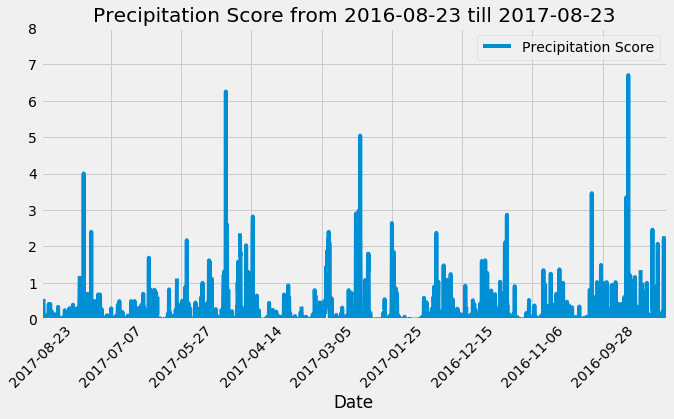

In [332]:
# Plot the precipitation for the past 12 months
#Step 5: Plot the results using the DataFrame plot method.
PRCP_data_DF.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {Start_Date} till {End_Date}',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")
plt.savefig("Images/1_Precipitation_Analysis.jpg")
plt.show()

In [333]:
# plt.savefig("Images/1_Precipitation_Analysis.jpg")
# plt.show()

In [334]:
# Use Pandas to calcualte the summary statistics for the precipitation data
PRCP_data_DF.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [335]:
# Station Analysis
# Design a query to calculate the total number of stations.
# Design a query to find the most active stations.
# List the stations and observation counts in descending order
# Which station has the highest number of observations?
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.

In [336]:
# Design a query to show how many stations are available in this dataset?
#Step1: Query to find the count the number of stations
#Method 1: Using session.execute and new f-string formatting for printing
# Total_stations = Session.execute("Select count(*) from Station").fetchall()
# print(f'Total number of stations is: {Total_stations[0][0]}')

# #Method 2: Using session.query and new-style string formatting
Total_stations = session.query(Station).count()
print('Total number of stations is: {}'.format(Total_stations))

Total number of stations is: 9


In [337]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Most_Active_stations = session.query(Measurement.station,func.count(Measurement.station))\
                                     .group_by(Measurement.station)\
                                     .order_by(desc(func.count(Measurement.station))).all()

In [338]:
#Method 2: Using session.query
Most_Active_stations = session.query(Measurement.station,func.count(Measurement.station))\
                                     .group_by(Measurement.station)\
                                     .order_by(desc(func.count(Measurement.station))).all()
#print("\n**Using session.query**")

In [339]:
#Step3: List the stations and the counts in descending order.
print("Rank\tStation ID\tObservations")
i = 1
for active_stations in Most_Active_stations:
    print("%d\t%s\t%d" %(i,active_stations[0],active_stations[1]))
    i+=1

Rank	Station ID	Observations
1	USC00519281	2772
2	USC00519397	2724
3	USC00513117	2709
4	USC00519523	2669
5	USC00516128	2612
6	USC00514830	2202
7	USC00511918	1979
8	USC00517948	1372
9	USC00518838	511


In [340]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Station_Highest_Obs = session.query(Measurement.station,func.count(Measurement.station))\
                      .group_by(Measurement.station)\
                      .order_by(desc(func.count(Measurement.station))).first()
#print("\n**Using session.query and concatenating strings for printing**")
#Station_Highest_Obs  
print("The station with the highest number of observation is "+str(Station_Highest_Obs[0])+" with " +\
      str(Station_Highest_Obs[1]) + " number of observations.")

The station with the highest number of observation is USC00519281 with 2772 number of observations.


In [341]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Step5: Query to calculate the lowest temperature recorded, highest temperature recorded, \
# and average temperature for the most active station.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station_Highest_Obs[0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [342]:
#Step6: Query the last 12 months of temperature observation data for this station 
Results = session.query(Measurement.date,Measurement.station,Measurement.tobs)\
             .filter(Measurement.date >= Start_Date).filter(Measurement.date<=End_Date)\
             .filter(Measurement.station == Station_Highest_Obs[0]).order_by(desc(Measurement.date)).all()
#Results

In [343]:
#Step7:(Intermediate) Creating a Dataframe with the above results
Last12_tobs_DF = pd.DataFrame(Results,columns=["Date","Station ID","Temperature_Recorded"])
Last12_tobs_DF.head()

,Date,Station ID,Temperature_Recorded
0,2017-08-18,USC00519281,79.0
1,2017-08-17,USC00519281,76.0
2,2017-08-16,USC00519281,76.0
3,2017-08-15,USC00519281,77.0
4,2017-08-14,USC00519281,77.0


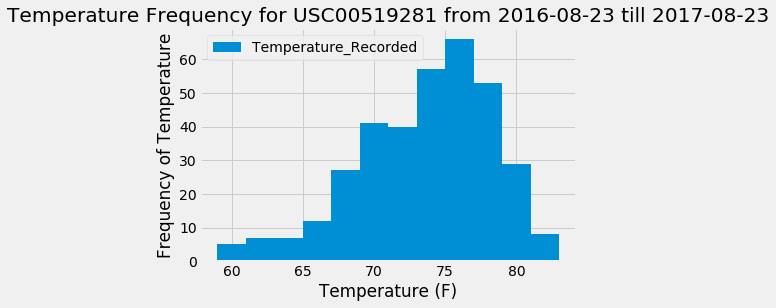

In [344]:
#Step8: Plot the results as a histogram
Last12_tobs_DF.plot.hist(by="Temperature_Recorded",bins=12,label="tobs",title=f'Temperature Frequency for {Station_Highest_Obs[0]} from {Start_Date} till {End_Date}')
plt.ylim=(0,80)
plt.ylabel("Frequency of Temperature")
plt.xlabel("Temperature (F)")
plt.legend=()
plt.savefig("Images/2_Temperature_Analysis.jpg")
plt.show()

In [345]:
# Temperature Analysis (Optional)¶
# The function calc_temps accepts a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
# Using the calc_temps function calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [346]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [347]:

#Step1: Calculate previous year's date based on the current trip start & end dates
Trip_start_date = input("Enter the trip start date in 'YYYY-MM-DD' format: ")
Trip_end_date = input("Enter the trip end date in 'YYYY-MM-DD' format: ")

Enter the trip start date in 'YYYY-MM-DD' format: 2016-12-30
Enter the trip end date in 'YYYY-MM-DD' format: 2017-01-07


In [348]:
#Step2: Calculate the previous year's dates based on the input dates
Struct = dt.date.today()
Trip_start_date_dateformat = Struct.replace(year=int(Trip_start_date[:4]),month=int(Trip_start_date[5:7]),day=int(Trip_start_date[8:]))
Previous_Trip_start_date = Trip_start_date_dateformat - dt.timedelta(days=365)
Previous_Trip_start_date = Previous_Trip_start_date.strftime("%Y-%m-%d")
Previous_Trip_start_date
Trip_end_date_dateformat = Struct.replace(year=int(Trip_end_date[:4]),month=int(Trip_end_date[5:7]),day=int(Trip_end_date[8:]))
Previous_Trip_end_date = Trip_end_date_dateformat - dt.timedelta(days=365)
Previous_Trip_end_date = Previous_Trip_end_date.strftime("%Y-%m-%d")
Previous_Trip_end_date

'2016-01-08'

In [349]:
#Step2: Call the function 'calc_temps' to calculate the tmin, tavg, and tmax for previous year's date
Result = calc_temps(Previous_Trip_start_date, Previous_Trip_end_date)
print(Result)

[(62.0, 69.98113207547169, 76.0)]


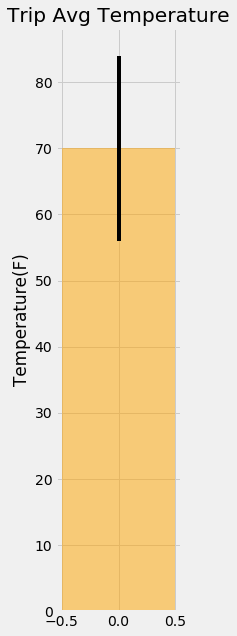

In [350]:
#Step 3: Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmin = Result[0][0]
tavg = Result[0][1]
tmax = Result[0][2]
y_err = tmax-tmin

plt.figure(figsize=(2,10))
plt.bar(0,tavg,yerr=y_err,align="center",width=1,color="orange",alpha=0.5)
plt.ylim=(0,120)
plt.ylabel("Temperature(F)")
plt.title("Trip Avg Temperature")
plt.savefig("Images/3_Trip_Avg_Temp_Analysis.jpg")
plt.show()

In [351]:
#Step4:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
Results = session.query(Measurement.station, func.sum(Measurement.prcp))\
                       .filter(Measurement.date>=Previous_Trip_start_date).filter(Measurement.date<=Previous_Trip_end_date)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()  
print("Station Id\tTotal Rainfall")
for each in Results: print(each[0],"\t",each[1])

Station Id	Total Rainfall
USC00516128 	 3.04
USC00519281 	 1.04
USC00513117 	 0.6200000000000001
USC00514830 	 0.22000000000000003
USC00519397 	 0.19
USC00519523 	 0.13
USC00517948 	 None


In [352]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
Results = session.query(*sel).filter(Measurement.station==Station.station)\
                       .filter(Measurement.date>=Previous_Trip_start_date).filter(Measurement.date<=Previous_Trip_end_date)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

print("Station\t\tStation_Name\t\tRainfall\tLatitude\tLongitude\tTemperature")


Station		Station_Name		Rainfall	Latitude	Longitude	Temperature


In [353]:
# for result in Results: print(result[0],"\t",result[1],"\t",result[2],"\t\t",result[3],"\t",result[4],"\t",result[5])

for result in Results: print(result)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 3.04, 21.3331, -157.8025, 152.4)
('USC00519281', 'WAIHEE 837.5, HI US', 1.04, 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 0.6200000000000001, 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.22000000000000003, 21.5213, -157.8374, 7.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.19, 21.2716, -157.8168, 3.0)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.13, 21.33556, -157.71139, 19.5)
('USC00517948', 'PEARL CITY, HI US', None, 21.3934, -157.9751, 11.9)
